In [1]:
import warnings
warnings.filterwarnings("ignore")

# 🕹 Jupyter Widgets

<br>

EOmaps provides a set of pre-configured [Jupyter Widgets](https://ipywidgets.readthedocs.io) that can be used to create interactive browser controls for a map. 

These widgets work just like any other [Jupyter Widgets](https://ipywidgets.readthedocs.io), but they have a pre-configured handler to perform commonly used tasks (switching layers, overlay layers, add/remove callbacks etc.)


:::{note}

Widgets are **only for Jupyter Notebooks** and require the additional dependencies: `ipywidgets` and `ipympl`

You can install it with `pip`:
```
pip install ipywidgets, ipympl
```

or with `conda`:
```
conda install -c conda-forge ipywidgets, ipympl
```
:::

**The following pre-defined widgets exist:**

:::{dropdown} Widgets to change the visible layer

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   LayerDropdown
   LayerSelect
   LayerSelectMultiple

.. autosummary:: 
   :nosignatures:

   LayerSelectionSlider
   LayerSelectionRangeSlider
   
.. autosummary:: 
   :nosignatures:

   LayerRadioButtons
   LayerToggleButtons

.. autosummary:: 
   :nosignatures:
   
   LayerOverlaySlider

```
:::



:::{dropdown} Widgets to attach callbacks

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   ClickAnnotateCheckbox
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox
   ClickPeekLayerCheckbox


.. autosummary:: 
   :nosignatures:
   
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox


.. autosummary:: 
   :nosignatures:
   
   PickAnnotateCheckbox
   PickMarkCheckbox
   PickPrintToConsoleCheckbox

:::

## How to use the widgets

All widgets expect a [`Maps`](eomaps.Maps) object as the first argument.  (e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

The basic call-signature for **layer-selector widgets** (buttons, sliders, dropdowns etc.) is:

```
layer_widget = Layer< WidgetName >(m, layers=[list of layer-names], **<kwargs passed to the widget>)
```

The basic call-signature for **layer-overlay widgets** is:

```
layer_overlay_widget = LayerOverlay< WidgetName >(m, layer=< layer to overlay >, **<kwargs passed to the widget>)
```


The basic call-signature for **callback widgets** is:

```
click_callback_widget = Click< WidgetName >(m, **<kwargs passed to the callback>)
pick_callback_widget = Pick< WidgetName >(m, **<kwargs passed to the callback>)
```


In [2]:
%matplotlib widget
from eomaps import Maps, widgets

LayerToggleButtons(description='Layers', index=1, options=('Countries', 'Ocean', 'base'), value='Ocean')

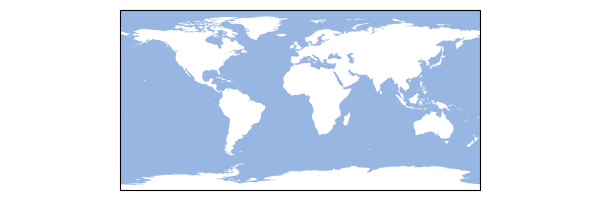

In [3]:
m = Maps(figsize=(6, 2))
m.add_feature.preset.coastline()

m.add_feature.preset.countries(layer="Countries")
m.add_feature.preset.ocean(layer="Ocean")
m.show_layer("Ocean")

display(widgets.LayerToggleButtons(m), m.f.canvas)